In [41]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")



In [58]:
nombre_archivo = ["Presupuesto_mensual_2021.xlsx", "Presupuesto_mensual_2022.xlsx", "Presupuesto_mensual_2023.xlsx", "Presupuesto_mensual_2024.xlsx"]
rango_hojas = list(range(1,13))

def excel_a_df(archivo, rango_hojas):
    df_compras = pd.DataFrame() #df vacio para almacenar los resultados
    for a in archivo:
        try:
            datos = pd.read_excel(a, sheet_name= rango_hojas, header= None, skiprows= 5)
            #concatenar todas las hojas de los arhicvos en el df final
            for hoja, df in datos.items():
                df_compras = pd.concat([df_compras, df], ignore_index= True) #directamente concatena
            #manejo de errores
        except ValueError as e:
            #print(f"Algunas hojas especificadas no existen en {archivo}: {e}")
            continue
        except Exception as e:
            #print(f"Error inesperado al procesar el libro {a} y la hoja {l}")
            continue
    return df_compras 


In [59]:
df = excel_a_df(nombre_archivo, rango_hojas)

In [60]:
#pd.set_option('display.max_rows', None)  # Mostrar todas las filas
df.head()

,0,1,2,3,4,5,6,7,8,9
0,N,2021-12-30,3.2,Perforadora,NaN,Chino,Vivienda,NaN,-44560.0,NaN
1,N,2021-12-30,1.2,Pincel de silicona,NaN,Chino,Vivienda,NaN,-44560.0,NaN
2,N,2021-12-30,0.5,Regla,NaN,Chino,Vivienda,NaN,-44560.0,NaN
3,N,2021-12-30,2.5,Resaltadores,NaN,Chino,Vivienda,NaN,-44560.0,NaN
4,N,2021-12-30,2.0,Cuaderno,NaN,Chino,Vivienda,NaN,-44560.0,NaN


In [61]:
#eliminar columnas que no voy a ocupar
df_completo = df.drop([0,4,7,8,9], axis = 1)
#verificar que se han eliminado las columnas

In [ ]:
df_completo


In [62]:
#ponerle nombre a las columnas
df_completo.columns = ['Fecha', 'Precio', 'Producto', 'Lugar', 'Categoria']
df_completo.sample()

,Fecha,Precio,Producto,Lugar,Categoria
817,2022-07-06,1.4,patatas gajo,Mercadona,Comida


In [71]:
#verificar los tipos de datos y hacer cambios donde se requiera
df_completo.dtypes

Unnamed: 0     int64
Fecha         object
Precio        object
Producto      object
Lugar         object
Categoria     object
dtype: object

In [72]:
# Convertir a datetime y eliminar la hora
df_completo['Fecha'] = pd.to_datetime(df_completo['Fecha'])
print(df_completo['Fecha'].dtype)  # Esto será: datetime64[ns]

datetime64[ns]


In [73]:
#convertir la columna precio de object a float
df_completo['Precio'] = pd.to_numeric(df_completo['Precio'], errors='coerce')
df_completo['Precio'].dtype

dtype('float64')

In [82]:
#Reemplazar algunos valores de Categoria para unificar criterios

df_completo['Categoria'] = df_completo['Categoria'].replace(
    {'Supermercado Otros': 'Supermercado', 
     'Comida': 'Supermercado', 
     'Comidas': 'Supermercado', 
     'Supermercados':'Supermercado',
     'Carnes': 'Supermercado',
     'Varios': 'Otros',
     'Salud/médicos': 'Farmacia'},
    regex = True
)

print(df_completo['Categoria'].unique())

['Vivienda' 'Supermercado' 'Farmacia' 'Salidas'
 'Suministros (luz, agua, gas, etc.)' 'Tramites' 'Transporte' 'Viajes' nan
 'Otros' 'Gastos personales' 'Gimnasio' 'Frutas/Verduras' 'Bebidas'
 'Limpieza']


In [83]:
#guardar en csv para ocuparlo cuando quiero continuar con el trabajo y no tener que recargar el código completo

df_completo.to_csv("compras_anuales.csv")

In [84]:
#Abrir csv para empezar a graficar

df_completo = pd.read_csv("compras_anuales.csv")

### Gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

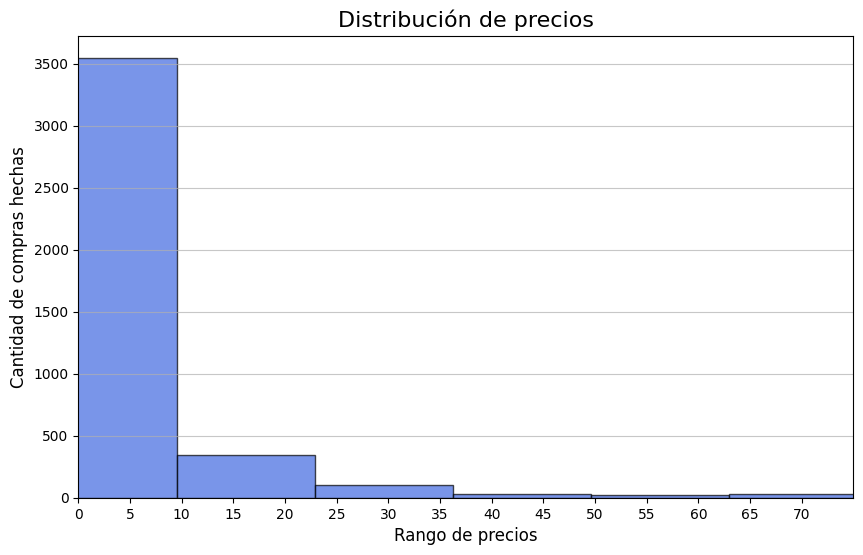

In [76]:
#Histograma para ver la distribución general de los precios

plt.figure(figsize=(10, 6))
plt.hist(df_completo['Precio'], bins = 30, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de precios', fontsize = 16)
plt.xlabel('Rango de precios', fontsize=12)
plt.ylabel('Cantidad de compras hechas', fontsize=12)
plt.grid(axis = 'y', alpha=0.7)
plt.xlim(0, 75)  # Limitar el eje X entre 0 y 200
plt.xticks(np.arange(0, 75, 5)) #configurar el eje x para que vaya de 5 en 5
plt.show

/var/folders/nm/scqkx_px2cv2000nz2c7h6j80000gp/T/ipykernel_1806/1815684374.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Precio', data=gasto_categoria_top5, palette='Set2')


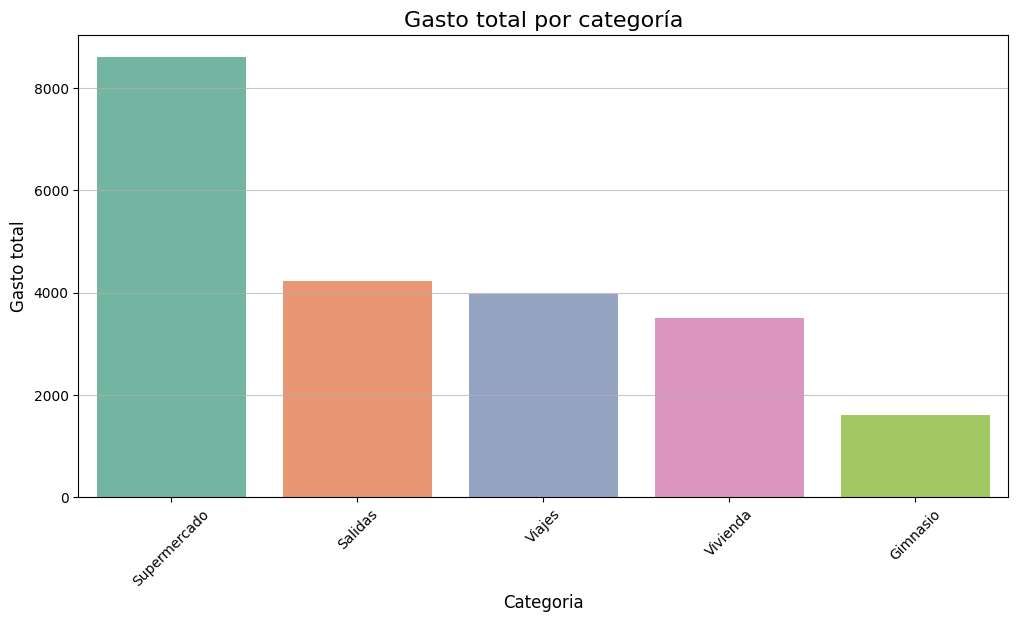

In [86]:
#Gráfico de gasto total por categoría

#Agrupar por categoría y calcular el gasto total de cada una

gasto_categoria = df_completo.groupby('Categoria')['Precio'].sum().reset_index()

#Ordenar por gasto total
gasto_categoria = gasto_categoria.sort_values('Precio', ascending=False)

# Obtener solo las 5 categorías con mayor gasto
gasto_categoria_top5 = gasto_categoria.head(5)

#Gráfico
plt.figure(figsize=(12,6))
sns.barplot(x='Categoria', y='Precio', data=gasto_categoria_top5, palette='Set2')
plt.title('Gasto total por categoría', fontsize = 16)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Gasto total', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha = 0.7)
plt.show()